In [1]:
import torch
import numpy as np
import matplotlib.pylab as plt

from IPython.display import Audio
from pyannote.core import Segment
from scipy.spatial.distance import cdist
from scipy.io import wavfile
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
%matplotlib inline


model = torch.hub.load('pyannote/pyannote-audio', 'emb')
print(f'Embedding has dimension {model.dimension:d}.')

Using cache found in /home/gabrielziegler/.cache/torch/hub/pyannote_pyannote-audio_master
/home/gabrielziegler/PyEnv/DeepLearning/lib/python3.9/site-packages/pyannote/audio/embedding/approaches/arcface_loss.py:170: FutureWarning: The 's' parameter is deprecated in favor of 'scale', and will be removed in a future release
  warnings.warn(msg, FutureWarning)


Embedding has dimension 512.


/home/gabrielziegler/PyEnv/DeepLearning/lib/python3.9/site-packages/torch/cuda/__init__.py:52: UserWarning: CUDA initialization: Found no NVIDIA driver on your system. Please check that you have an NVIDIA GPU and installed a driver from http://www.nvidia.com/Download/index.aspx (Triggered internally at  /pytorch/c10/cuda/CUDAFunctions.cpp:100.)
  return torch._C._cuda_getDeviceCount() > 0


# Female voice

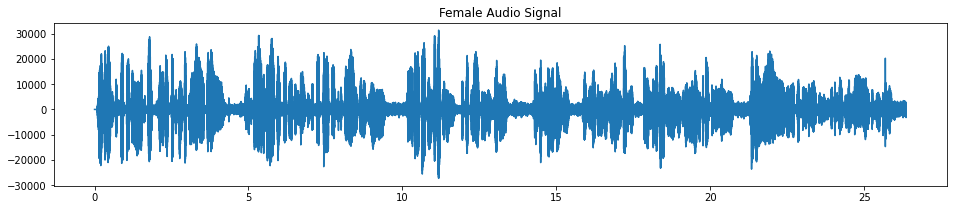

In [2]:
female_audio_file = "data/female.wav"
female_audio_sr, female_audio = wavfile.read(female_audio_file)

Audio(filename=female_audio_file)
female_audio_time = np.linspace(0, len(female_audio) / female_audio_sr, num=len(female_audio))

_ = plt.figure(figsize=(16, 3))
_ = plt.title("Female Audio Signal")
_ = plt.xlabel("Time (s)")
_ = plt.xlabel("")
_ = plt.plot(female_audio_time, female_audio)

# Voice activity detection

Using cache found in /home/gabrielziegler/.cache/torch/hub/pyannote_pyannote-audio_master


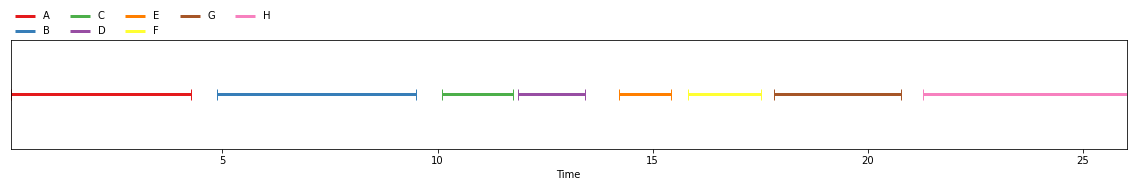

In [3]:
pipeline = torch.hub.load('pyannote/pyannote-audio', 'sad', pipeline=True)

speech_activity_detection = pipeline({'audio': female_audio_file})
speech_activity_detection

# Voice embedding

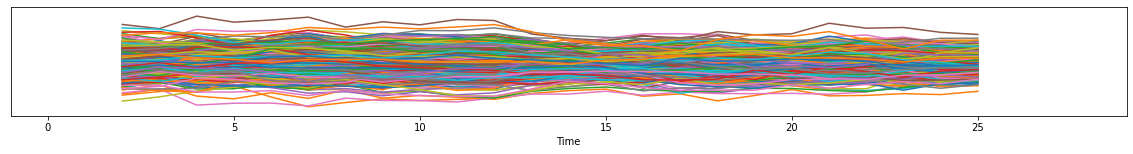

In [4]:
female_embedding = model({'audio': female_audio_file})
female_embedding
for window, emb in female_embedding:
    assert isinstance(window, Segment)
    assert isinstance(emb, np.ndarray)  

# Male voice

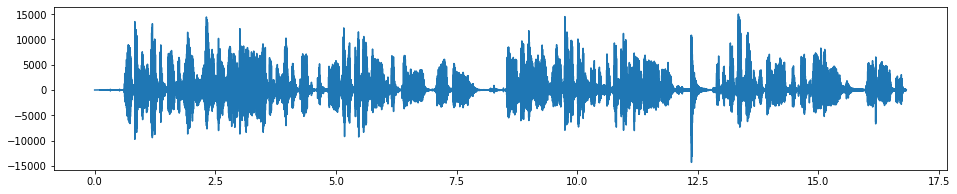

In [5]:
male_audio_file = "data/male.wav"
male_audio_sr, male_audio = wavfile.read(male_audio_file)

Audio(filename=male_audio_file)
male_audio_time = np.linspace(0, len(male_audio) / male_audio_sr, num=len(male_audio))

_ = plt.figure(figsize=(16, 3))
_ = plt.plot(male_audio_time, male_audio)

# Voice activity detection

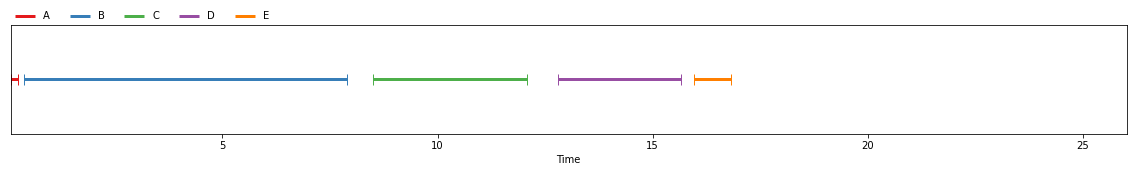

In [6]:
speech_activity_detection = pipeline({'audio': male_audio_file})
speech_activity_detection

# Voice embedding

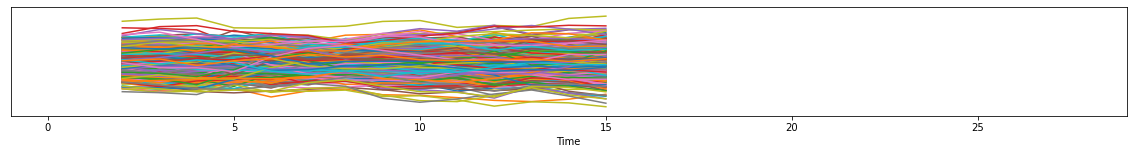

In [7]:
male_embedding = model({'audio': male_audio_file})
male_embedding
for window, emb in male_embedding:
    assert isinstance(window, Segment)
    assert isinstance(emb, np.ndarray)  

# Compare distance of both embeddings

In [8]:
distance = cdist(np.mean(female_embedding, axis=0, keepdims=True), 
                 np.mean(male_embedding, axis=0, keepdims=True), 
                 metric='cosine')[0, 0]
distance

0.9331949942760286

# Load another voice segment from the same male

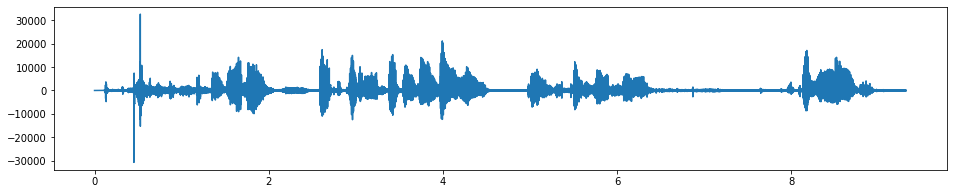

In [9]:
male2_audio_file = "data/zig.wav"
male2_audio_sr, male2_audio = wavfile.read(male2_audio_file)

Audio(filename=male2_audio_file)
male2_audio_time = np.linspace(0, len(male2_audio) / male2_audio_sr, num=len(male2_audio))

_ = plt.figure(figsize=(16, 3))
_ = plt.plot(male2_audio_time, male2_audio)

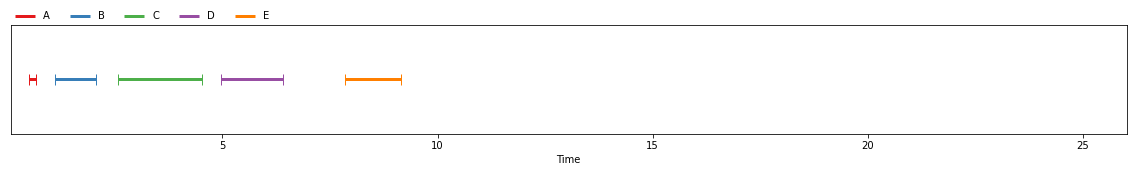

In [10]:
speech_activity_detection = pipeline({'audio': male2_audio_file})
speech_activity_detection

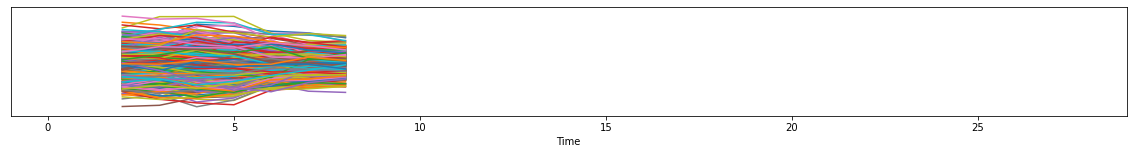

In [11]:
male2_embedding = model({'audio': male2_audio_file})
male2_embedding
for window, emb in male2_embedding:
    assert isinstance(window, Segment)
    assert isinstance(emb, np.ndarray)  

In [12]:
distance = cdist(np.mean(male2_embedding, axis=0, keepdims=True), 
                 np.mean(male_embedding, axis=0, keepdims=True), 
                 metric='cosine')[0, 0]
distance

0.2705535068803677